## The curse of dimensionality



We&rsquo;ll consider various metric properties of $\mathbb{R}^n$.  We&rsquo;ll
find that there&rsquo;s more space than you might think in higher
dimensions, which should serve as a warning to you: when your data
sits in some high-dimensional space, you are in danger of having
sparser data than you might expect!  This is the **curse of
dimensionality** and it motivates various dimension-reduction
procedures that we&rsquo;ll be studying this week.

The story we tell here &#x2013; particularly that the volume of the $n$-ball
reaches a maximum (!) &#x2013; is not only an important observation for data
science but also for geometry and, well, for mathematics.



## The volume of a hypersphere



The volume of the $n$-ball can be computed as follows.



In [1]:
import numpy as np
from scipy.special import gamma

def volume_ball(n,r):
    return (np.pi ** (n/2)) * (r**n) / gamma( 1 + n/2 )
print(volume_ball(2,1))

3.141592653589793


But this is a data science course, so let&rsquo;s see if we can &ldquo;check&rdquo; this
formula via some monte carlo method.

****Warning:**** I&rsquo;ve purposefully included a typo in the code below.  Can
you catch it and fix the bug?q



In [2]:
import numpy as np

def volume_ball_mc(n,r):
    count = 100000
    points = np.random.uniform( -r, r, size=(count,n) )
    cube_volume = (2*r)**n
    #print("cube volume is", cube_volume)
    # There is a bug somewhere in this code!  Find it, fix it
    sphere_to_cube = np.sum(np.linalg.norm(points,axis=1) < r) / count
    #print("Sphere to cube is", sphere_to_cube)
    return cube_volume * sphere_to_cube

Our definition of `volume_ball` involved `np.pi` but there&rsquo;s no $\pi$
in `volume_ball_mc`.  Let&rsquo;s estimate it!  This also serves as a quick
check that you fixed the bug.



In [3]:
print(volume_ball_mc(2,1))
print(volume_ball(2,1))
print(volume_ball_mc(3,1)*3/4)

3.14832
3.141592653589793
3.14778


****Plot these**** as functions of $n$.

For which $n$ is `volume_ball(n,1)` the largest?

In `volume_ball_mc`, play with `count` and consider say `n = 20`.  How
likely is a point in a high-dimensional cube to also be in a
high-dimensional sphere?



In [4]:
import matplotlib.pyplot as plt
plt.plot([x for x in np.linspace(0, 50, 100)],[volume_ball(n,1) for n in np.linspace(0, 50, 100)],'*')
plt.plot([x for x in range(0, 50)],[volume_ball_mc(n,1) for n in range(0, 50)],'*')
plt.xlim(0,10)


(0, 10)

## Distance to nearest neighbors



Let&rsquo;s again consider randomly chosen points in $\mathbb{R}^n$.  How
far do we expect each point is to nearby neighbors?



In [5]:
import scipy.spatial

def nearest_neighbor_distances(points, k):
    neighbors = []
    tree = scipy.spatial.cKDTree(points)
    dd, ii = tree.query(points, k=range(2,2+k))
    return dd

def average_knn_distance(n):
    count = 10000
    points = np.random.uniform( -1, 1, size=(count,n) )
    return np.mean( nearest_neighbor_distances( points, 1 ) )

Plot `average_knn_distance` for various values of `n`.  Does this
worry you at all?  Even when $n$ isn&rsquo;t **that** large, $\mathbb{R}^n$ is
a lonely place.  When we do clustering, we&rsquo;ll often care about
pairwise distances, so we must face this problem.  One way out is
through various **dimensionality reduction** algorithms.



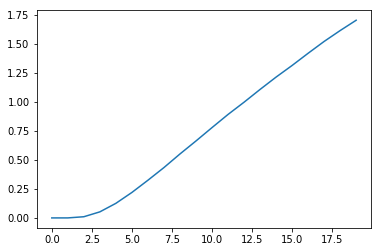

In [8]:
plt.plot([x for x in range(0, 20)],[average_knn_distance(x) for x in range(0, 20)])